In [47]:
import pandas as pd
import numpy as np
import os
import re

os.chdir('C://Users//Administrator//Desktop//Projects//playstore//')

In [50]:
d1 =pd.read_csv('googleplaystore.csv')
d2=pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
d1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [4]:
d2.head(2)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462


# CLEANING

In [5]:
d1.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [6]:
d1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
d1.isna().sum(axis =0)

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [8]:
d1.Type.fillna(d1.Type.value_counts().index[0],inplace =True)
d1['Content Rating'].fillna(d1['Content Rating'].value_counts().index[0],inplace =True)
d1['Current Ver'].fillna(d1['Current Ver'].value_counts().index[0],inplace = True)
d1['Android Ver'].fillna(d1['Android Ver'].value_counts().index[0],inplace = True)
d1['Rating'].fillna(d1['Rating'].mean(),inplace =True)

In [9]:
d1.isna().sum(axis =0)

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [10]:
d1.Rating.plot(kind ='Hist')

In [11]:
d1['Rating'] = np.where(d1.Rating>5 ,d1.Rating.mean(),d1.Rating)

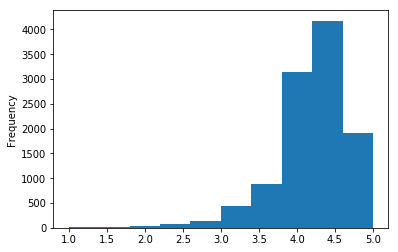

In [12]:
d1.Rating.plot(kind ='Hist')

# DATA WRANGLING

In [13]:
d1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [14]:
def clean(x):
    try:
        return(int(re.sub('[^0-9]','',x)))
    except:
        return 0

In [16]:
d1['Installs'] = d1.Installs.apply(clean)
d1['Reviews'] = d1.Reviews.apply(clean) 
d1['Size'] = d1.Size.apply(clean)
d1['Price'] = d1.Price.apply(clean) 

In [17]:
d1.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.191973,4.441119e+05,46.062079,1.546291e+07,102.727331
std,0.478885,2.927629e+06,91.454791,8.502557e+07,1594.897082
min,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,14.000000,1.000000e+03,0.000000
50%,4.200000,2.094000e+03,29.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,53.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1020.000000,1.000000e+09,40000.000000


In [18]:
#index =0
#while(index <= len(d1)):
    #try:
        #d1['Last Updated'] = pd.to_datetime(d1['Last Updated']).dt.date
        #index = index+1
    #except:
        #index = index+1
        #pass        

In [29]:
def ver1(x):
    try:
        int(x.split(' ')[0][0])
        return x.split(' ')[0]
    except:
        return 0

def ver2(x):
    try:
        int(x.split(' ')[0][0])
        return x.split(' ')[2]
    except:
        return 0

In [33]:
d1['v1'] = d1['Android Ver'].apply(ver1)
d1['v2'] = d1['Android Ver'].apply(ver2)

In [34]:
d1.drop(['Current Ver'],axis =1,inplace=True)
d1.drop(['Android Ver'],axis =1,inplace=True)

In [44]:
d1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,v1,v2
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",4.0.3,up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",4.0.3,up


In [46]:
#d1['v2'].value_counts()

In [42]:
d1.Type.fillna(d1.Type.value_counts().index[0],inplace = True)
d1.Category.fillna(d1.Category.value_counts().index[0],inplace = True)

In [48]:
d1.to_csv('googleplaystore_cleaned.csv')

In [ ]:
## USER REVIEWS

In [51]:
d2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [53]:
d2.dropna(axis = 0,inplace = True)

In [54]:
d2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


In [55]:
d2.shape

(37427, 5)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
